In [68]:
import pandas as pd
import seaborn as sns

In [115]:
df = pd.read_csv('Batch_5179091_batch_results_3.csv')
df['Answer.appropriate.label'] = df['Answer.appropriate.label'].apply(lambda x: x.split('-')[0] )

df_info = df[['WorkerId', 'WorkTimeInSeconds', 'HITId','Input.conversation','Input.response','Input.eval_indicator', 'SubmitTime', 'Input.rand', 'Answer.appropriate.label']]
df_info["Answer.appropriate.label"] = pd.to_numeric(df_info["Answer.appropriate.label"], errors="coerce")

df_info_sort = df_info.sort_values('Answer.appropriate.label')
df_info_sort

/tmp/ipykernel_4160411/836618458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info["Answer.appropriate.label"] = pd.to_numeric(df_info["Answer.appropriate.label"], errors="coerce")


,WorkerId,WorkTimeInSeconds,HITId,Input.conversation,Input.response,Input.eval_indicator,SubmitTime,Input.rand,Answer.appropriate.label
18,A1EX0MEOPF8AHT,66,3WRKFXQBOCOXRQLDUCJC724N854IYI,You will be shown a 3 session dialogues betwee...,Neighbors A:Definitely. Speaking of being care...,Engagingness,Tue Jan 23 23:15:02 PST 2024,0,1
91,A3QI1RV4HQ9MOC,20,3BFF0DJK8YTQ4IPFPIQR3NIV21OSTV,You will be shown a 2 session dialogues betwee...,Classmates A:Keep an eye out for promotions an...,Engagingness,Tue Jan 23 23:17:03 PST 2024,1,2
54,A1EX0MEOPF8AHT,81,3Y40HMYLL2ZD0CQ3JXMO7RLP0UXXUZ,You will be shown a 2 session dialogues betwee...,Coach:It sounds like you're in a good place ri...,Engagingness,Tue Jan 23 23:15:18 PST 2024,0,2
93,A3QI1RV4HQ9MOC,12,36FFXPMSTA5L1H6RI7ST5Z56UIQOHK,You will be shown a 5 session dialogues betwee...,Neighbors A:It sounds like she takes after you...,Engagingness,Tue Jan 23 23:16:34 PST 2024,1,2
71,A3QI1RV4HQ9MOC,1063,3P520RYKCIN4YT6TDR3TF8U57VO5UY,You will be shown a 5 session dialogues betwee...,"Mentee:Not really, it's just little things tha...",Engagingness,Wed Jan 24 01:32:59 PST 2024,1,2
...,...,...,...,...,...,...,...,...,...
94,A1IOMFFEKCWOIT,261,36FFXPMSTA5L1H6RI7ST5Z56UIQOHK,You will be shown a 5 session dialogues betwee...,Neighbors A:It sounds like she takes after you...,Engagingness,Tue Jan 23 23:19:08 PST 2024,1,5
95,A2PYXFVGNJPPX0,420,36FFXPMSTA5L1H6RI7ST5Z56UIQOHK,You will be shown a 5 session dialogues betwee...,Neighbors A:It sounds like she takes after you...,Engagingness,Tue Jan 23 23:24:17 PST 2024,1,5
96,A1EX0MEOPF8AHT,47,3KVQ0UJWPY2HQXVY8RIUXWF2SBZ5WX,You will be shown a 5 session dialogues betwee...,Mentor:It's okay to feel overwhelmed. Just rem...,Engagingness,Tue Jan 23 23:16:47 PST 2024,1,5
32,A2PYXFVGNJPPX0,273,382GHPVPHT823GPAK2OIN7YRUM934J,You will be shown a 3 session dialogues betwee...,"Co-workers A:Thank you, that means a lot. It's...",Engagingness,Wed Jan 24 01:19:24 PST 2024,0,5


In [70]:
df_info[df_info['Input.rand']==0].describe()

,Input.rand,Answer.appropriate.label
count,59.0,59.000000
mean,0.0,3.559322
std,0.0,0.856440
min,0.0,1.000000
25%,0.0,3.000000
50%,0.0,4.000000
75%,0.0,4.000000
max,0.0,5.000000


In [71]:
df_info[df_info['Input.rand']==1].describe()

,Input.rand,Answer.appropriate.label
count,58.0,58.000000
mean,1.0,3.862069
std,0.0,0.867509
min,1.0,2.000000
25%,1.0,3.000000
50%,1.0,4.000000
75%,1.0,4.000000
max,1.0,5.000000


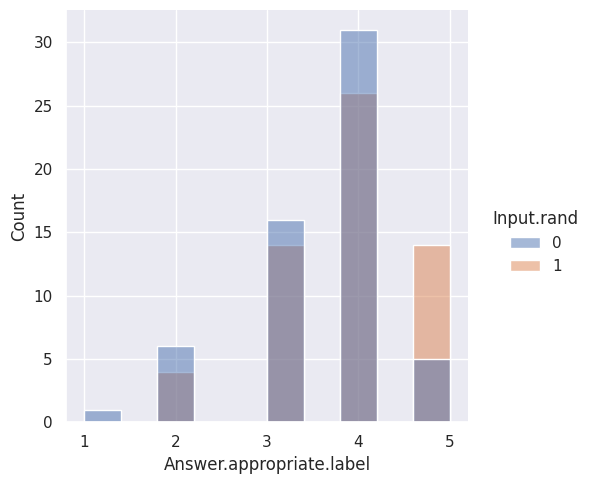

In [73]:
sns.set(rc={'figure.figsize':(3,5)})
sns.displot(data=df_info, x='Answer.appropriate.label', hue='Input.rand')#, kind='kde')

/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Input.rand', ylabel='Answer.appropriate.label'>

/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/uj-user/Yo/hybrid-ltm/ltm-venv/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


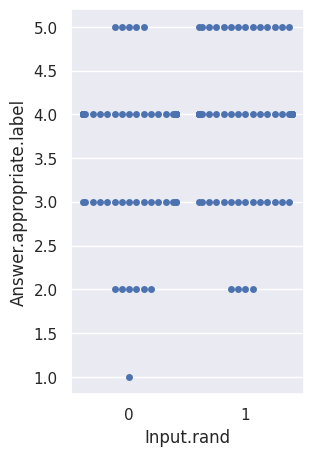

In [64]:
sns.set(rc={'figure.figsize':(3,5)})
sns.swarmplot(data=df_info, y='Answer.appropriate.label', x='Input.rand')#, kind='kde')

/tmp/ipykernel_4160411/2839794499.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


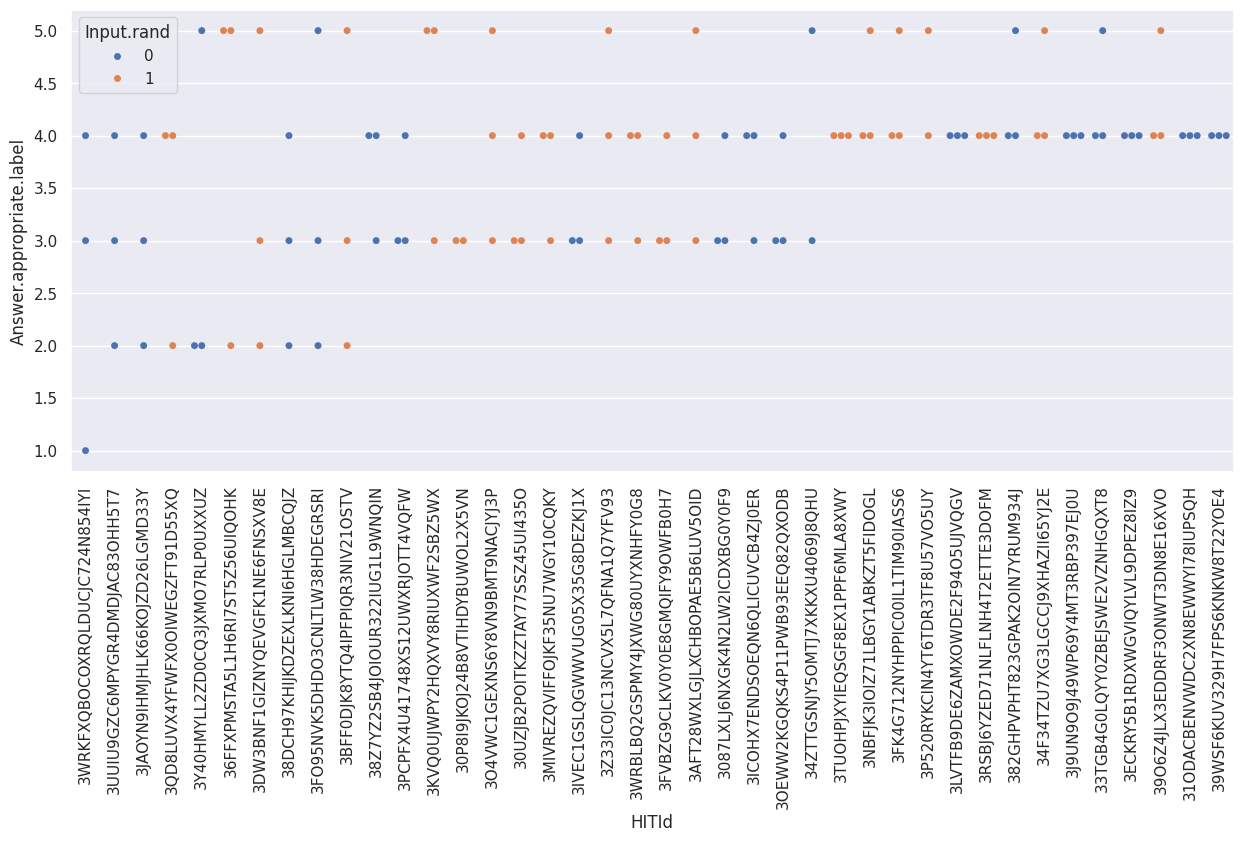

In [65]:
sns.set(rc={'figure.figsize':(15,6)})

ax = sns.swarmplot(data=df_info_sort, x='HITId', y='Answer.appropriate.label', hue='Input.rand')#, kind='kde')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

/tmp/ipykernel_4160411/3432856019.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


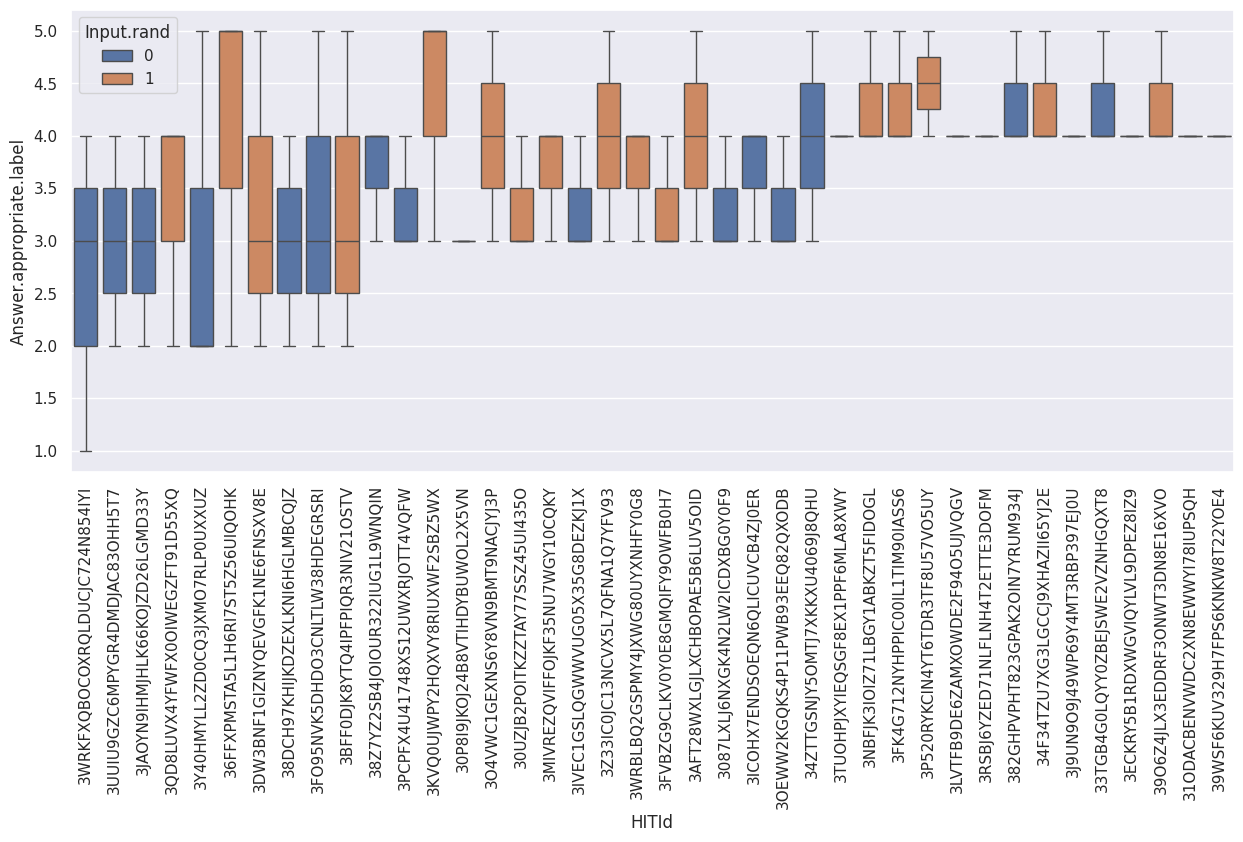

In [66]:
sns.set(rc={'figure.figsize':(15,6)})

ax = sns.boxplot(data=df_info_sort, x='HITId', y='Answer.appropriate.label', hue='Input.rand')#, kind='kde')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

In [88]:
#독립변수
#종속변수

# 분석하고자하는 것: 가설

#정규성을 확인해서 맞으면 T분포/ 맨휘트니분포

df_info[df_info['Input.rand']==0].sort_values('HITId')

,HITId,Input.conversation,Input.response,Input.eval_indicator,SubmitTime,Input.rand,Answer.appropriate.label
47,3087LXLJ6NXGK4N2LW2ICDXBG0Y0F9,You will be shown a 4 session dialogues betwee...,"Neighbors B:That's really cool. Actually, it r...",Engagingness,Tue Jan 23 23:17:18 PST 2024,0,3
46,3087LXLJ6NXGK4N2LW2ICDXBG0Y0F9,You will be shown a 4 session dialogues betwee...,"Neighbors B:That's really cool. Actually, it r...",Engagingness,Tue Jan 23 23:17:00 PST 2024,0,4
45,3087LXLJ6NXGK4N2LW2ICDXBG0Y0F9,You will be shown a 4 session dialogues betwee...,"Neighbors B:That's really cool. Actually, it r...",Engagingness,Tue Jan 23 23:16:13 PST 2024,0,3
8,31ODACBENVWDC2XN8EWWYI78IUPSQH,You will be shown a 3 session dialogues betwee...,Doctor:That's great to hear. I'm glad you're e...,Engagingness,Tue Jan 23 23:17:59 PST 2024,0,4
6,31ODACBENVWDC2XN8EWWYI78IUPSQH,You will be shown a 3 session dialogues betwee...,Doctor:That's great to hear. I'm glad you're e...,Engagingness,Tue Jan 23 23:17:23 PST 2024,0,4
7,31ODACBENVWDC2XN8EWWYI78IUPSQH,You will be shown a 3 session dialogues betwee...,Doctor:That's great to hear. I'm glad you're e...,Engagingness,Tue Jan 23 23:17:37 PST 2024,0,4
23,33TGB4G0LQYY0ZBEJSWE2VZNHGQXT8,You will be shown a 5 session dialogues betwee...,"Classmates A:Yeah, that was a pretty successfu...",Engagingness,Tue Jan 23 23:20:15 PST 2024,0,5
21,33TGB4G0LQYY0ZBEJSWE2VZNHGQXT8,You will be shown a 5 session dialogues betwee...,"Classmates A:Yeah, that was a pretty successfu...",Engagingness,Tue Jan 23 23:16:30 PST 2024,0,4
22,33TGB4G0LQYY0ZBEJSWE2VZNHGQXT8,You will be shown a 5 session dialogues betwee...,"Classmates A:Yeah, that was a pretty successfu...",Engagingness,Tue Jan 23 23:17:53 PST 2024,0,4
34,34ZTTGSNJY5OMTJ7XKKXU4069J8QHU,You will be shown a 2 session dialogues betwee...,"Co-workers A:Absolutely. Hey, remember when I ...",Engagingness,Tue Jan 23 23:16:36 PST 2024,0,5


In [89]:
df_info[df_info['Input.rand']==1].sort_values('HITId')

,HITId,Input.conversation,Input.response,Input.eval_indicator,SubmitTime,Input.rand,Answer.appropriate.label
74,30P8I9JKOJ24B8VTIHDYBUWOL2X5VN,You will be shown a 4 session dialogues betwee...,"Classmates B:Oh my gosh, that sounds terrible!...",Engagingness,Wed Jan 24 01:33:06 PST 2024,1,4
73,30P8I9JKOJ24B8VTIHDYBUWOL2X5VN,You will be shown a 4 session dialogues betwee...,"Classmates B:Oh my gosh, that sounds terrible!...",Engagingness,Tue Jan 23 23:18:03 PST 2024,1,3
72,30P8I9JKOJ24B8VTIHDYBUWOL2X5VN,You will be shown a 4 session dialogues betwee...,"Classmates B:Oh my gosh, that sounds terrible!...",Engagingness,Tue Jan 23 23:17:16 PST 2024,1,3
105,30UZJB2POITKZZTAY77SSZ45UI435O,You will be shown a 5 session dialogues betwee...,"Mentor:Yes, I have. It's great to see celebrit...",Engagingness,Tue Jan 23 23:14:59 PST 2024,1,3
106,30UZJB2POITKZZTAY77SSZ45UI435O,You will be shown a 5 session dialogues betwee...,"Mentor:Yes, I have. It's great to see celebrit...",Engagingness,Tue Jan 23 23:16:46 PST 2024,1,3
107,30UZJB2POITKZZTAY77SSZ45UI435O,You will be shown a 5 session dialogues betwee...,"Mentor:Yes, I have. It's great to see celebrit...",Engagingness,Wed Jan 24 01:19:49 PST 2024,1,4
89,34F34TZU7XG3LGCCJ9XHAZII65YJ2E,You will be shown a 3 session dialogues betwee...,Co-workers A:You're right. It's like how I sta...,Engagingness,Wed Jan 24 01:20:06 PST 2024,1,5
88,34F34TZU7XG3LGCCJ9XHAZII65YJ2E,You will be shown a 3 session dialogues betwee...,Co-workers A:You're right. It's like how I sta...,Engagingness,Tue Jan 23 23:17:31 PST 2024,1,4
87,34F34TZU7XG3LGCCJ9XHAZII65YJ2E,You will be shown a 3 session dialogues betwee...,Co-workers A:You're right. It's like how I sta...,Engagingness,Tue Jan 23 23:16:54 PST 2024,1,4
94,36FFXPMSTA5L1H6RI7ST5Z56UIQOHK,You will be shown a 5 session dialogues betwee...,Neighbors A:It sounds like she takes after you...,Engagingness,Tue Jan 23 23:19:08 PST 2024,1,5


In [96]:
group1 = df_info[df_info['Input.rand']==0]['Answer.appropriate.label'].to_numpy()
group2 = df_info[df_info['Input.rand']==1]['Answer.appropriate.label'].to_numpy()
group2

array(['4 ', '3 ', '4 ', '4 ', '4 ', '5 ', '4 ', '3 ', '3 ', '5 ', '4 ',
       '2 ', '3 ', '3 ', '4 ', '4 ', '5 ', '4 ', '4 ', '4 ', '4 ', '4 ',
       '5 ', '4 ', '3 ', '2 ', '5 ', '4 ', '4 ', '5 ', '3 ', '2 ', '5 ',
       '2 ', '5 ', '5 ', '5 ', '5 ', '3 ', '4 ', '4 ', '4 ', '4 ', '4 ',
       '2 ', '3 ', '3 ', '4 ', '3 ', '4 ', '5 ', '4 ', '5 ', '3 ', '4 ',
       '5 ', '3 ', '4 ', '3 ', '4 '], dtype=object)

In [99]:
import numpy as np
from scipy.stats import ttest_ind

# 두 그룹 데이터를 입력 받습니다.
group1 = df_info[df_info['Input.rand']==0]['Answer.appropriate.label'].to_numpy().astype(np.int64)
group2 = df_info[df_info['Input.rand']==1]['Answer.appropriate.label'].to_numpy().astype(np.int64)

# t-test를 수행합니다.
ttest_result = ttest_ind(group1, group2)

# p-value를 출력합니다.
print(ttest_result.pvalue)

0.07681771096927333


In [113]:
df_info.groupby(['WorkerId','Input.rand'])['Answer.appropriate.label'].describe()

count      mean       std  min   25%  50%   75%  \
WorkerId       Input.rand                                                    
A16X5FB3HAFCKN 0             4.0  3.000000  0.816497  2.0  2.75  3.0  3.25   
               1             6.0  3.166667  0.752773  2.0  3.00  3.0  3.75   
A1EX0MEOPF8AHT 0            16.0  3.562500  1.030776  1.0  3.00  4.0  4.00   
               1            12.0  3.916667  0.668558  3.0  3.75  4.0  4.00   
A1G96GPSRSLPC0 0            14.0  3.642857  0.497245  3.0  3.00  4.0  4.00   
               1            11.0  3.818182  0.404520  3.0  4.00  4.0  4.00   
A1IOMFFEKCWOIT 0             6.0  4.000000  0.632456  3.0  4.00  4.0  4.00   
               1             3.0  4.333333  0.577350  4.0  4.00  4.0  4.50   
A1XO6ONCCTBMKW 0             2.0  3.000000  1.414214  2.0  2.50  3.0  3.50   
A28A3HF3LSEIDT 0             4.0  4.000000  0.000000  4.0  4.00  4.0  4.00   
               1             8.0  4.625000  0.744024  3.0  4.75  5.0  5.00   
A2BAQ26SMQQEUG 0             2.0  4.000000  0.000000  4.0  4.00  4.0  4.00   
               1             4.0  4.000000  0.816497  3.0  3.75  4.0  4.25   
A2PYXFVGNJPPX0 0             4.0  4.500000  0.577350  4.0  4.00  4.5  5.00   
               1             6.0  4.166667  0.752773  3.0  4.00  4.0  4.75   
A3QI1RV4HQ9MOC 0             8.0  2.625000  0.517549  2.0  2.00  3.0  3.00   
               1             8.0  2.875000  1.125992  2.0  2.00  2.5  3.25   
A5LYLHG880ABE  1             2.0  4.000000  1.414214  3.0  3.50  4.0  4.50   

                           max  
WorkerId       Input.rand       
A16X5FB3HAFCKN 0           4.0  
               1           4.0  
A1EX0MEOPF8AHT 0           5.0  
               1           5.0  
A1G96GPSRSLPC0 0           4.0  
               1           4.0  
A1IOMFFEKCWOIT 0           5.0  
               1           5.0  
A1XO6ONCCTBMKW 0           4.0  
A28A3HF3LSEIDT 0           4.0  
               1           5.0  
A2BAQ26SMQQEUG 0           4.0  
               1           5.0  
A2PYXFVGNJPPX0 0           5.0  
               1           5.0  
A3QI1RV4HQ9MOC 0           3.0  
               1           5.0  
A5LYLHG880ABE  1           5.0

In [117]:
df_info.groupby(['WorkerId'])['WorkTimeInSeconds'].describe()

,count,mean,std,min,25%,50%,75%,max
WorkerId,,,,,,,,
A16X5FB3HAFCKN,10.0,11.400000,6.221825,5.0,6.25,10.0,14.75,22.0
A1EX0MEOPF8AHT,28.0,104.392857,132.564265,14.0,47.00,63.5,82.50,496.0
A1G96GPSRSLPC0,25.0,18.680000,8.474078,6.0,11.00,19.0,25.00,35.0
A1IOMFFEKCWOIT,9.0,319.333333,46.308746,246.0,275.00,334.0,360.00,365.0
A1XO6ONCCTBMKW,2.0,925.000000,24.041631,908.0,916.50,925.0,933.50,942.0
A28A3HF3LSEIDT,12.0,27.333333,21.818813,6.0,10.25,20.0,37.25,72.0
A2BAQ26SMQQEUG,6.0,14.000000,12.569805,5.0,7.50,10.0,12.50,39.0
A2PYXFVGNJPPX0,10.0,214.000000,122.303811,7.0,216.75,240.5,255.50,420.0
A3QI1RV4HQ9MOC,16.0,221.937500,407.407653,8.0,19.00,39.0,59.25,1063.0
